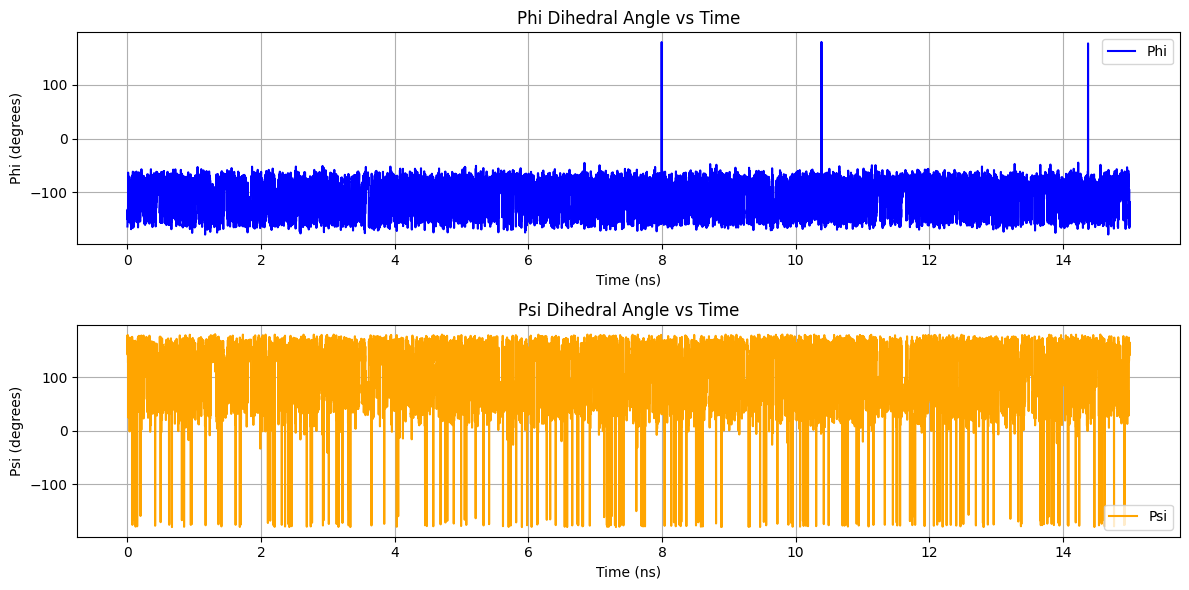

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Set the paths to your files
trajectory_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.trr'
topology_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.gro'

# Load the trajectory and topology files
traj = md.load(trajectory_file, top=topology_file)

# Compute phi and psi dihedrals
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles to degrees
phi_angles = phi_angles * (180/np.pi)
psi_angles = psi_angles * (180/np.pi)

# Time in nanoseconds
time_ns = traj.time / 1000.0  # Convert to ns

# Plotting
plt.figure(figsize=(12, 6))

# Phi plot
plt.subplot(2, 1, 1)
plt.plot(time_ns, phi_angles, label='Phi', color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (degrees)')
plt.title('Phi Dihedral Angle vs Time')
plt.grid()
plt.legend()

# Psi plot
plt.subplot(2, 1, 2)
plt.plot(time_ns, psi_angles, label='Psi', color='orange')
plt.xlabel('Time (ns)')
plt.ylabel('Psi (degrees)')
plt.title('Psi Dihedral Angle vs Time')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


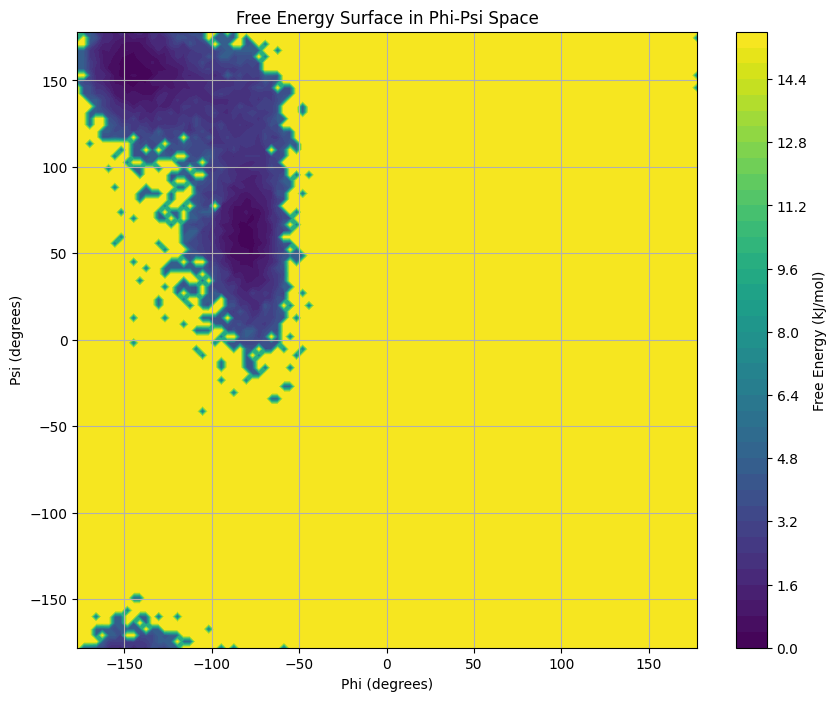

In [8]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Set the paths to your files
trajectory_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.trr'
topology_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.gro'

# Load the trajectory and topology files
traj = md.load(trajectory_file, top=topology_file)

# Compute phi and psi dihedrals
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles to degrees
phi_angles = np.array(phi_angles) * (180/np.pi)
psi_angles = np.array(psi_angles) * (180/np.pi)

# Create 2D histogram
hist, phi_edges, psi_edges = np.histogram2d(phi_angles.flatten(), psi_angles.flatten(), bins=100, density=True)

# Compute free energy F(phi, psi) = -log(histogram)
# Add a small value to avoid log(0)
F = -np.log(hist + 1e-10)

# Normalize the free energy surface
F_min = F.min()
F -= F_min

# Create meshgrid for plotting
phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
Phi, Psi = np.meshgrid(phi_centers, psi_centers)

# Plotting the Free Energy Surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(Phi, Psi, F.T, levels=50, cmap='viridis')
plt.colorbar(contour, label='Free Energy (kJ/mol)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface in Phi-Psi Space')
plt.grid()
plt.show()


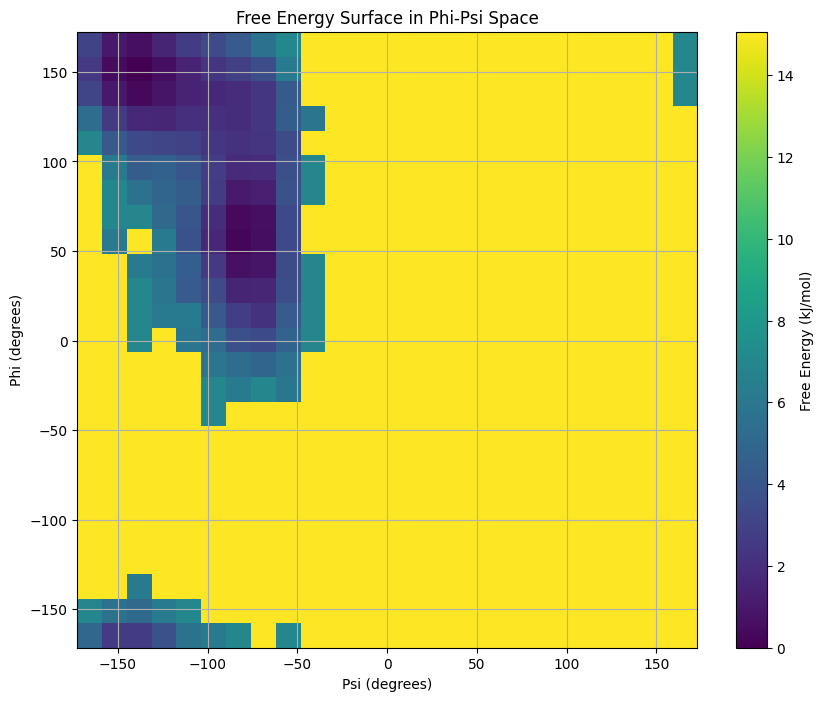

In [9]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(traj, bins=25):
    # Compute phi and psi dihedrals
    phi_indices, phi_angles = md.compute_phi(traj)
    psi_indices, psi_angles = md.compute_psi(traj)

    # Convert angles to degrees and ensure they're numpy arrays
    phi_angles = np.array(phi_angles) * (180/np.pi)
    psi_angles = np.array(psi_angles) * (180/np.pi)

    # Create 2D histogram with specified bins
    hist, phi_edges, psi_edges = np.histogram2d(phi_angles.flatten(), psi_angles.flatten(), bins=bins, density=True)

    # Compute free energy F(phi, psi) = -log(histogram)
    # Add a small value to avoid log(0)
    F = -np.log(hist + 1e-10)

    # Normalize the free energy surface
    F_min = F.min()
    F -= F_min

    # Create meshgrid for plotting
    phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
    psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
    Phi, Psi = np.meshgrid(phi_centers, psi_centers)

    return F.T, Phi, Psi  # Transpose F for proper orientation in plotting

# Set the paths to your files
trajectory_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.trr'
topology_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.gro'

# Load the trajectory and topology files
traj = md.load(trajectory_file, top=topology_file)

# Compute the free energy surface
F, Phi, Psi = compute_fes(traj, bins=25)

# Plotting the Free Energy Surface
plt.figure(figsize=(10, 8))
plt.imshow(F, extent=[Psi.min(), Psi.max(), Phi.min(), Phi.max()], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Free Energy (kJ/mol)')
plt.xlabel('Psi (degrees)')
plt.ylabel('Phi (degrees)')
plt.title('Free Energy Surface in Phi-Psi Space')
plt.grid()
plt.show()
